#  <center> Data Science 100 Group Project <center>
## <center> Predicting Age from Systolic Blood Pressure and Cholesterol <center>

## Introduction

In this analysis, we used a [Heart Disease Dataset](https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset) from Kaggle. We took two regression approaches, k-nearest neighbours and linear regression, to explore the results and which regression engine works best for this dataset.

The data table is populated with variables related to or contributing to heart disease, including age, number of cigarettes per day, blood pressure, and cholesterol. The question we are aiming to answer with this data is whether we can accurately predict an individual’s age, based on their total cholesterol levels and systolic blood pressure using regression analysis. Furthermore, we aim to determine whether k-nearest nearest neighbours or linear regression is a more suitable model for addressing this question. Our hypothesis is that patients with higher age are more predisposed to high cholesterol and blood pressure (expanded on below) and thus that total cholesterol and systolic blood pressure can be used as proxies to estimate age. 

Cholesterol is a waxy biological substance produced by the liver and found in all cells throughout the body (Medline Plus, 2020). It is an important addition to human health as it aids in the production of sex hormones, serves as a building block for tissue, and assists in the production of bile from the liver (Healthline, 2022). Variations of cholesterol are present and can be measured in the body, including Low-Density Lipoprotein (LDL - bad), High-Density Lipoprotein (HDL- good), non-HDL, triglycerides, and total cholesterol. Each reading is delivered in units of 1 milligram per deci-litre (mg/dL). Total cholesterol is defined as a combined reading of both LDL and HDL cholesterol in the blood, which is considered healthy when it is below 170 mg/dL in anyone age 19 or younger. For the average person over 20 years of age, cholesterol typically ranges between 125-200 mg/dL (Medline Plus, 2020). As the Center for Disease Control and Prevention (CDC) writes, cholesterol levels in the blood are affected by several primary factors, referred to as “risk factors''. The more risk factors a person has, the higher risk they are at of having high cholesterol levels. These factors include diet, exercise, genetics, certain diseases or conditions, and age, among others (“Know Your Risk for High Cholesterol”, 2023). We thus chose to focus on total cholesterol because it is correlated with age. The CDC explains this correlation between age and cholesterol: “our bodies can’t clear cholesterol from the blood as easily as they could when they were younger,” leading to cholesterol building up in the circulatory system (“Know Your Risk for High Cholesterol”, 2023). It is important that research is conducted on cholesterol levels in the blood and its risk factors, because high blood cholesterol can be the cause of several health problems, most notably atherosclerosis and coronary heart disease (Tsao et al, 2022). Atherosclerosis is a condition that means hardening or stiffening of blood vessels, which can also lead to higher blood pressure (Johns Hopkins Medicine, 2023). This leads into the discussion of our next predictor, systolic blood pressure.

The American Heart Association (AHA) defines hypertension as having a systolic blood pressure higher than 130 mmHg or a diastolic blood pressure over 80 mmHg. Hypertension has also been found to have a link to age among other causes such as certain diseases or conditions, genetics, and diet. The CDC asserts that “blood pressure tends to increase” with age (CDC, 2023). Other sources also agree, writing that “the increase in blood pressure with age is mostly associated with structural changes in the arteries and especially with large artery stiffness” (Pinto, 2007). In other words, arteries tend to lose their elasticity with age, becoming stiffer, resulting in higher blood pressure. This is also why it was important that we looked at systolic blood pressure as a predictor in conjunction with blood cholesterol levels given they have a connection with one another as well as a correlation with age. Specifically, cholesterol build-up in arteries restricts blood flow, causing higher blood pressure. Analyzing these factors together can allow us to assess this correlation numerically. If our hypothesis is found true, the implication is that people can be informed of their risk for hypertension given their age. More generally, specific age groups can be informed of their innate risk of heart disease which can increase awareness of the risk factors within their control. 

## Methods & Results

Our study investigates whether age can be accurately predicted by systolic blood pressure and total cholesterol using regression analysis. To ensure data quality, we first filtered out any missing values (“NA”)  in the columns of interest. Next, we split the data into training and testing sets using 75% for training and 25% for testing.

We employed two regression techniques in our analysis: k-nearest neighbours (knn) and linear regression. The knn regression was conducted using the optimal value of k calibrated through cross-validation to minimize root mean square error (RSME). We proceeded with the resulting k value of 25. We then used the resulting model to predict age in the test data set and assessed the performance via the root mean percentage square error (RMPSE). RMPSE was found to be 8.74.

The second component of the analysis involved linear regression. A new model was created to fit the training data with the model specification engine set to “lm”. This model was subsequently used to predict age for both the training and testing data to determine RSME and RMPSE which were 7.67 and 7.85, respectively. 

We compared the error values obtained from both the k-nearest neighbours and linear regression models and plotted the true and predicted age values resulting from both analyses. In doing so, we evaluated the accuracy of each model and determined linear regression provided the best predictions for age based on systolic blood pressure and total cholesterol. The RMPSE for linear regression was found to be 7.85, lower than the RMPSE of knn regression which was 8.74. 


## Data Analysis

In [20]:
## load packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(patchwork)

In [21]:
## read data and mutate response variable to be a factor
url <- "https://raw.githubusercontent.com/Kyleetd/DSCI100-Course-Project-2023/main/heart_disease.csv"

heart_disease_data <- read_csv(url)

head(heart_disease_data)

Rows: 4238 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Gender, education, prevalentStroke, Heart_ stroke
dbl (12): age, currentSmoker, cigsPerDay, BPMeds, prevalentHyp, diabetes, to...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Male,39,postgraduate,0,0,0,no,0,0,195,106.0,70,26.97,80,77,No
Female,46,primaryschool,0,0,0,no,0,0,250,121.0,81,28.73,95,76,No
Male,48,uneducated,1,20,0,no,0,0,245,127.5,80,25.34,75,70,No
Female,61,graduate,1,30,0,no,1,0,225,150.0,95,28.58,65,103,yes
Female,46,graduate,1,23,0,no,0,0,285,130.0,84,23.10,85,85,No
Female,43,primaryschool,0,0,0,no,1,0,228,180.0,110,30.30,77,99,No


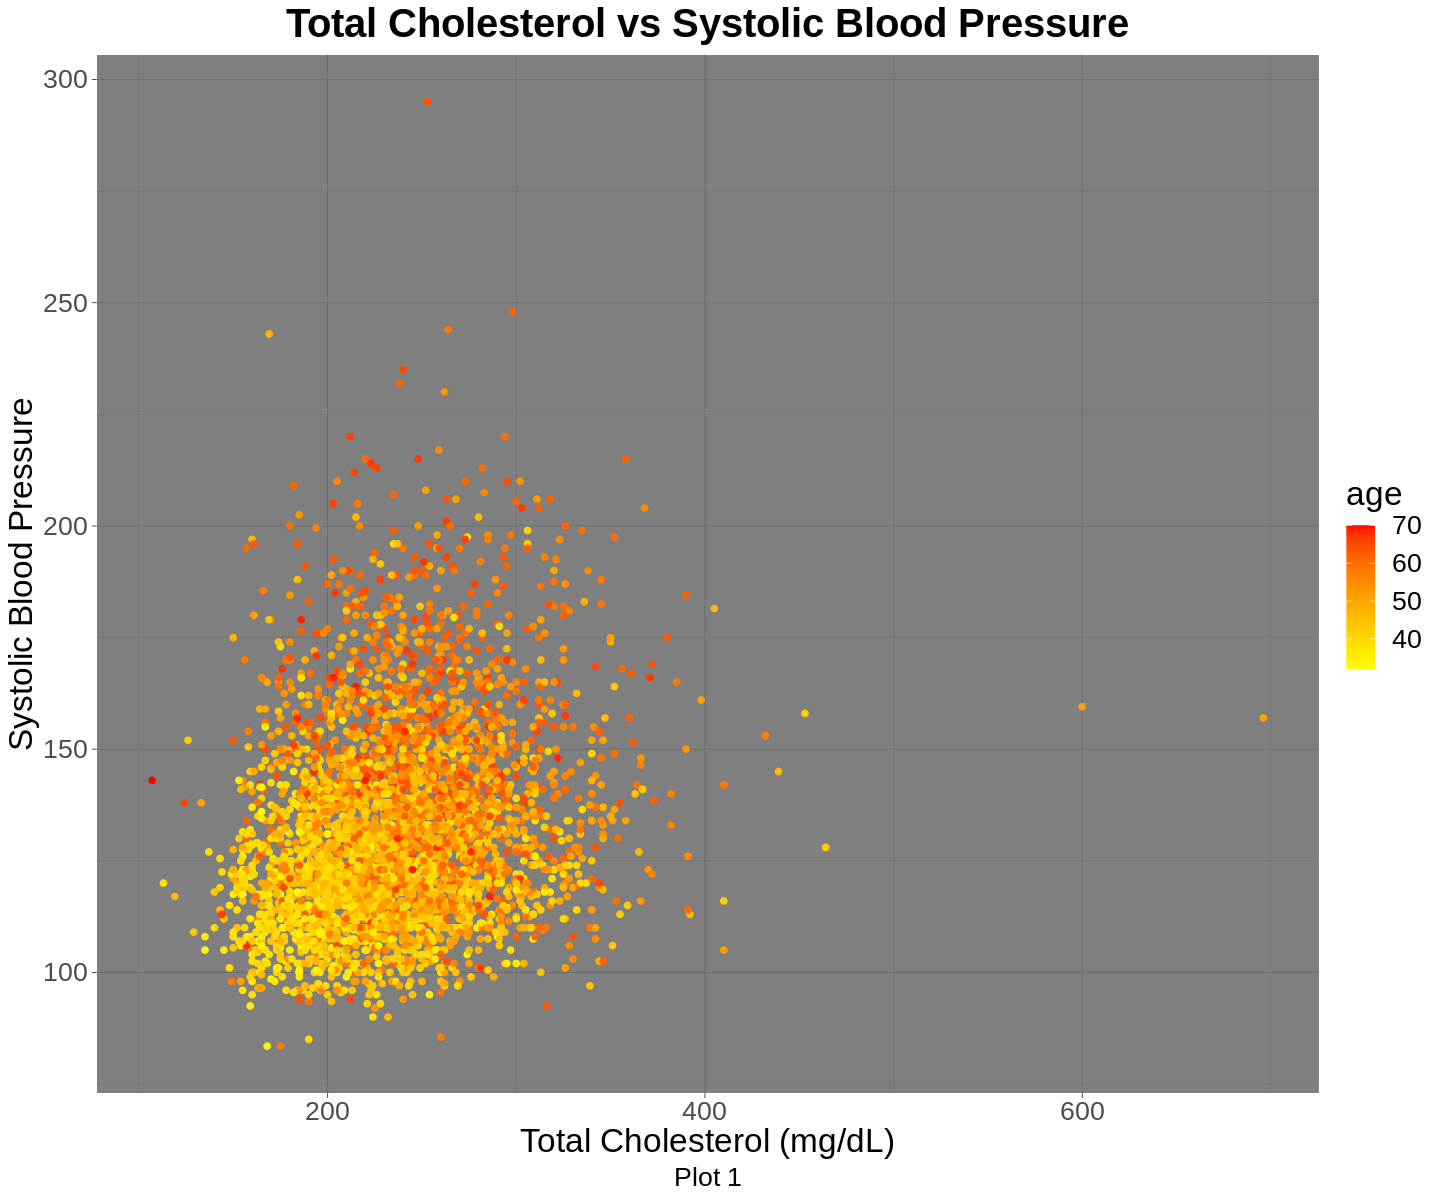

In [34]:
## Filter data and select data so there's no N/A observations in the predictor variables
## Filter data so there's no N/A observations in the predictor variables
heart_disease_filtered <- filter(heart_disease_data, age != "NA", totChol != "NA", sysBP != "NA") 

options(repr.plot.width=12, repr.plot.height=10)
plot <- ggplot(heart_disease_filtered, aes(x = totChol, y = sysBP, color = age)) +
  geom_point() +
  labs(x = "Total Cholesterol (mg/dL)", 
       y = "Systolic Blood Pressure", 
       title = "Total Cholesterol vs Systolic Blood Pressure", 
       caption = "Plot 1") +
  theme_dark() +
  scale_color_gradient(low = "yellow", high = "red") + # Add color gradient
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

plot

Plot 1 shows a weak and spread positive trend in the predictor variables and the response variable. As cholestoral and systolic blood pressure rise in tandem, these data points tend to be associated with higher ages. This leads supports our hypothesis that 

In [23]:
## Establish training and testing data sets
set.seed(5)
heart_disease_split <- initial_split(heart_disease_filtered, prop = 0.75, strata = age)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

### KNN Regression

In [24]:
## Calibrating Parameter K

## Create model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("regression")

## Create recipe, scale and center data
heart_recipe <- recipe(age ~ totChol + sysBP, data = heart_disease_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

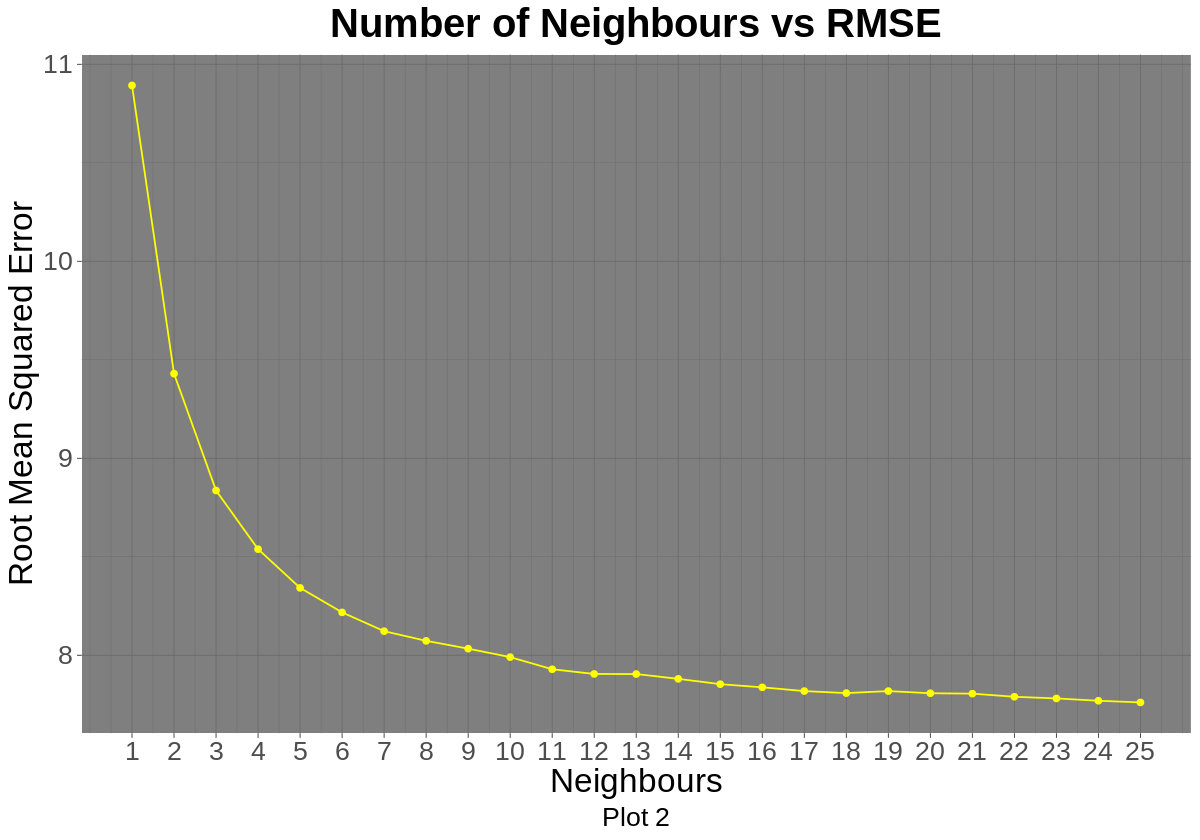

In [36]:
set.seed(5)

# Cross validation
heart_vfold <- vfold_cv(heart_disease_train, v = 10, strata = age) ## use 10

## k values to try
k_vals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

## Create a workflow & get accuracy metrics
heart_accuracies <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = heart_vfold, grid = k_vals) |>
      collect_metrics() |>
      filter(.metric == "rmse")

## Plot the 𝑘 vs the accuracy
options(repr.plot.width=10, repr.plot.height=7)

cross_val_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
  geom_point(color = "yellow") +
  geom_line(color = "yellow") +
  labs(x = "Neighbours", 
       y = "Root Mean Squared Error", 
       title = "Number of Neighbours vs RMSE", 
       caption = "Plot 2") +
  scale_x_continuous(breaks = round(seq(min(heart_accuracies$neighbors), max(heart_accuracies$neighbors), by = 1),1)) +
  theme_dark() +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

cross_val_plot

In [37]:
## Select highest accuracy k
k <- heart_accuracies |>
    arrange(mean) |>
    slice(1) |>
    pull(neighbors)
print(sprintf("K: %s", k))

## Get RSME
rsme_knn <- heart_accuracies |>
    arrange(mean) |>
    slice(1) |>
    pull(mean)
print(sprintf("RSME: %s", rsme_knn))

[1] "K: 25"
[1] "RSME: 7.7605914166747"


#### Conducting Classification with Highest Accuracy K

In [38]:
## New model specification
knn_refined_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
      set_engine("kknn") |>
      set_mode("regression")

## New workflow 
heart_fit <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      fit(data = heart_disease_train)

Warning message:
“tune samples were requested but there were 3139 rows in the data. 3134 will be used.”


#### Predict 

In [39]:
set.seed(5) 

## predict on the test dataset using refined model
predictions <- predict(heart_fit, heart_disease_test) |>
      bind_cols(heart_disease_test) ## add prediction column to testing_set dataframe 

## accuracy of this prediction (RMPSE)
metrics <- predictions |>
  metrics(truth = age, estimate = .pred)
  
metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.74147994
rsq,standard,0.07905344
mae,standard,7.43734514


#### Plots for KNN Regression Results

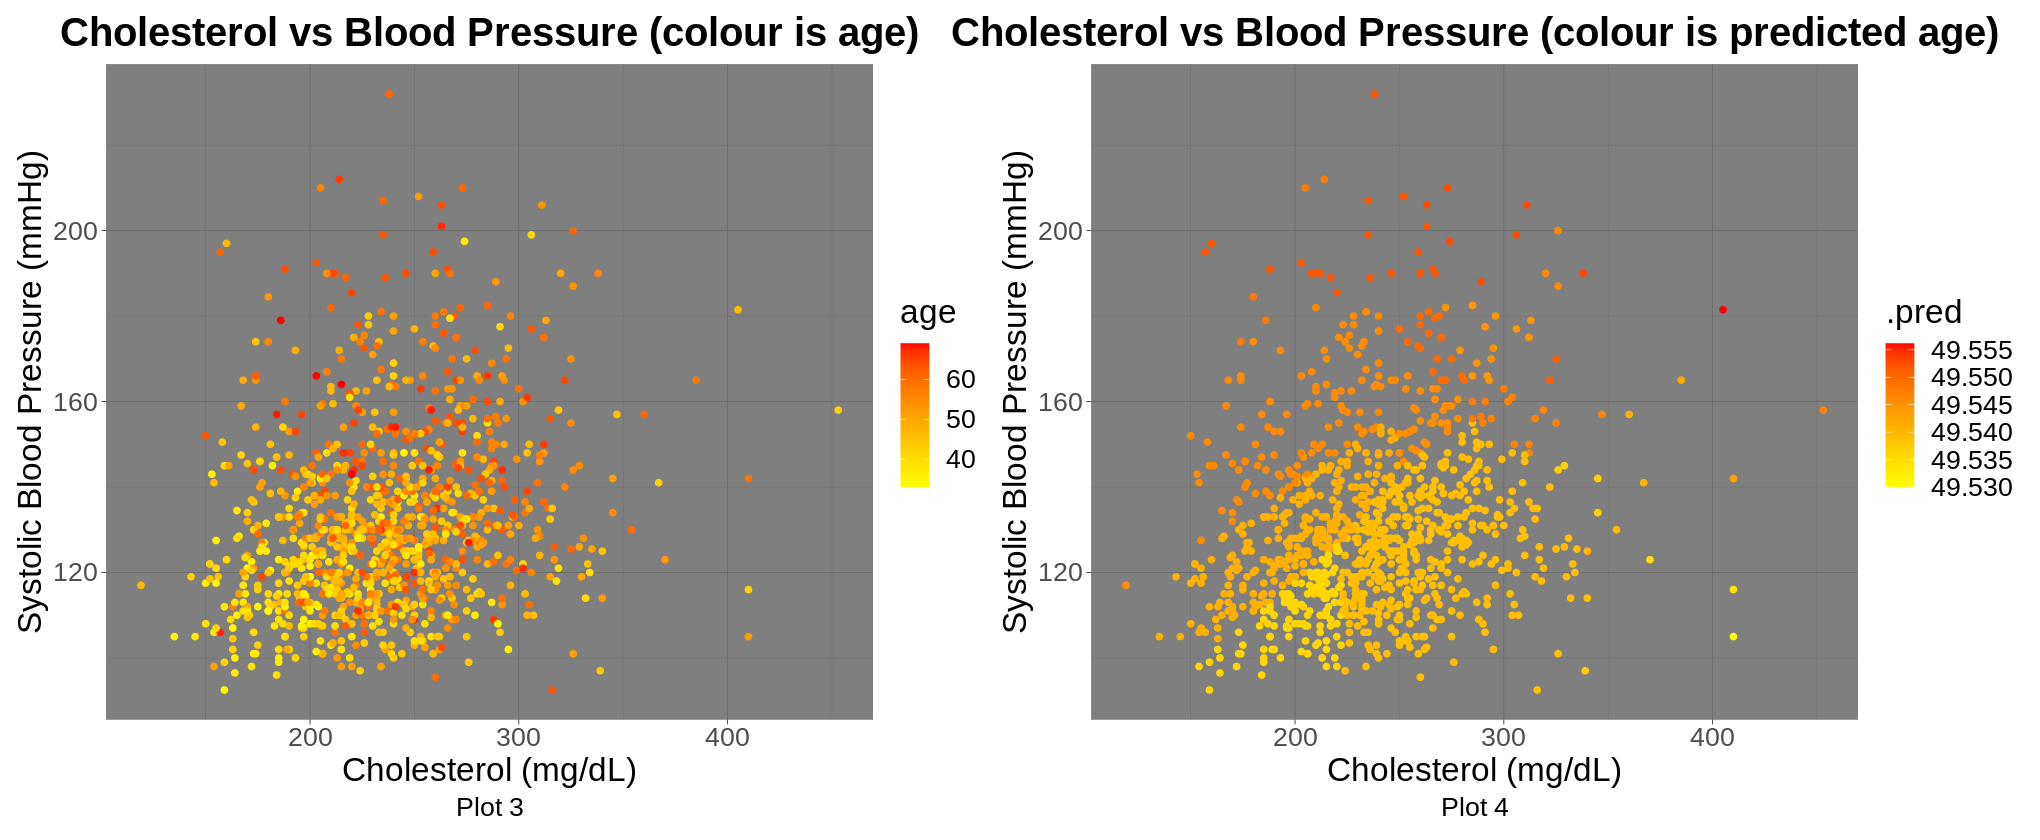

In [40]:
options(repr.plot.width=17, repr.plot.height=7)

knn_plot1 <- predictions |>
  ggplot(aes(x = totChol, y = sysBP, color = age)) +
  geom_point() +
  labs(x = "Cholesterol (mg/dL)", 
       y = "Systolic Blood Pressure (mmHg)", 
       title = "Cholesterol vs Blood Pressure (colour is age)", 
       caption = "Plot 3") +
  theme_dark() +
  scale_color_gradient(low = "yellow", high = "red") + # Add color gradient
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

knn_plot2 <- predictions |>
  ggplot(aes(x = totChol, y = sysBP, color = .pred)) +
  geom_point() +
  labs(x = "Cholesterol (mg/dL)", 
       y = "Systolic Blood Pressure (mmHg)", 
       title = "Cholesterol vs Blood Pressure (colour is predicted age)", 
       caption = "Plot 4") +
  theme_dark() +
 scale_color_gradient(low = "yellow", high = "red") + # Add color gradient
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

knn_plot1 + knn_plot2 +
  plot_layout(ncol = 2)

The range of the .pred class on Plot 4 differs drastically from the actual range of the age variable. A plausible reason for this discrepancy is that there is no distinct clustering of the data points. While higher age does tend to be associated with higher level of both predictor variables, the data is still very spread. This can cause an averaging effect when the k nearest neighbours are used. The range of pred suggests that the mean value of the k nearest neighbours is contained in the range around 40.5.

### Linear Regression

In [30]:
## do not need to use cross-validation or standardize (center & scale) the data for linear regression
set.seed(5)

lm_spec <- linear_reg() %>%
                set_engine("lm") %>%
                set_mode("regression")

lm_recipe <- recipe(age ~ totChol + sysBP, data = heart_disease_train)

lm_fit <- workflow() %>%
                add_recipe(lm_recipe) %>%
                add_model(lm_spec) %>%
                fit(data = heart_disease_train)

lm_rmse <- lm_fit %>%
                predict(heart_disease_train) %>%
                bind_cols(heart_disease_train) %>%
                metrics(truth = age, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()

print(sprintf("RSME: %s", lm_rmse))

lm_rmspe <- lm_fit %>%
                predict(heart_disease_test) %>%
                bind_cols(heart_disease_test) %>%
                metrics(truth = age, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()

print(sprintf("RSMPE: %s", lm_rmspe))

[1] "RSME: 7.66854538232256"
[1] "RSMPE: 7.84938559356337"


K-nearest neighbours regression resulted in a RSME of 7.628 and an RMSPE of 8.741. Linear regression resulted in an RSME of 7.669 and a RMSPE of 7.849. This suggests that linear regression did a slightly better job of predicting on the test data. However, both modes of regression analysis resulted in low error values meaning that the cumulative sum of deviances between the predicted values and the true values was small.

#### Plots for Linear Regression Results

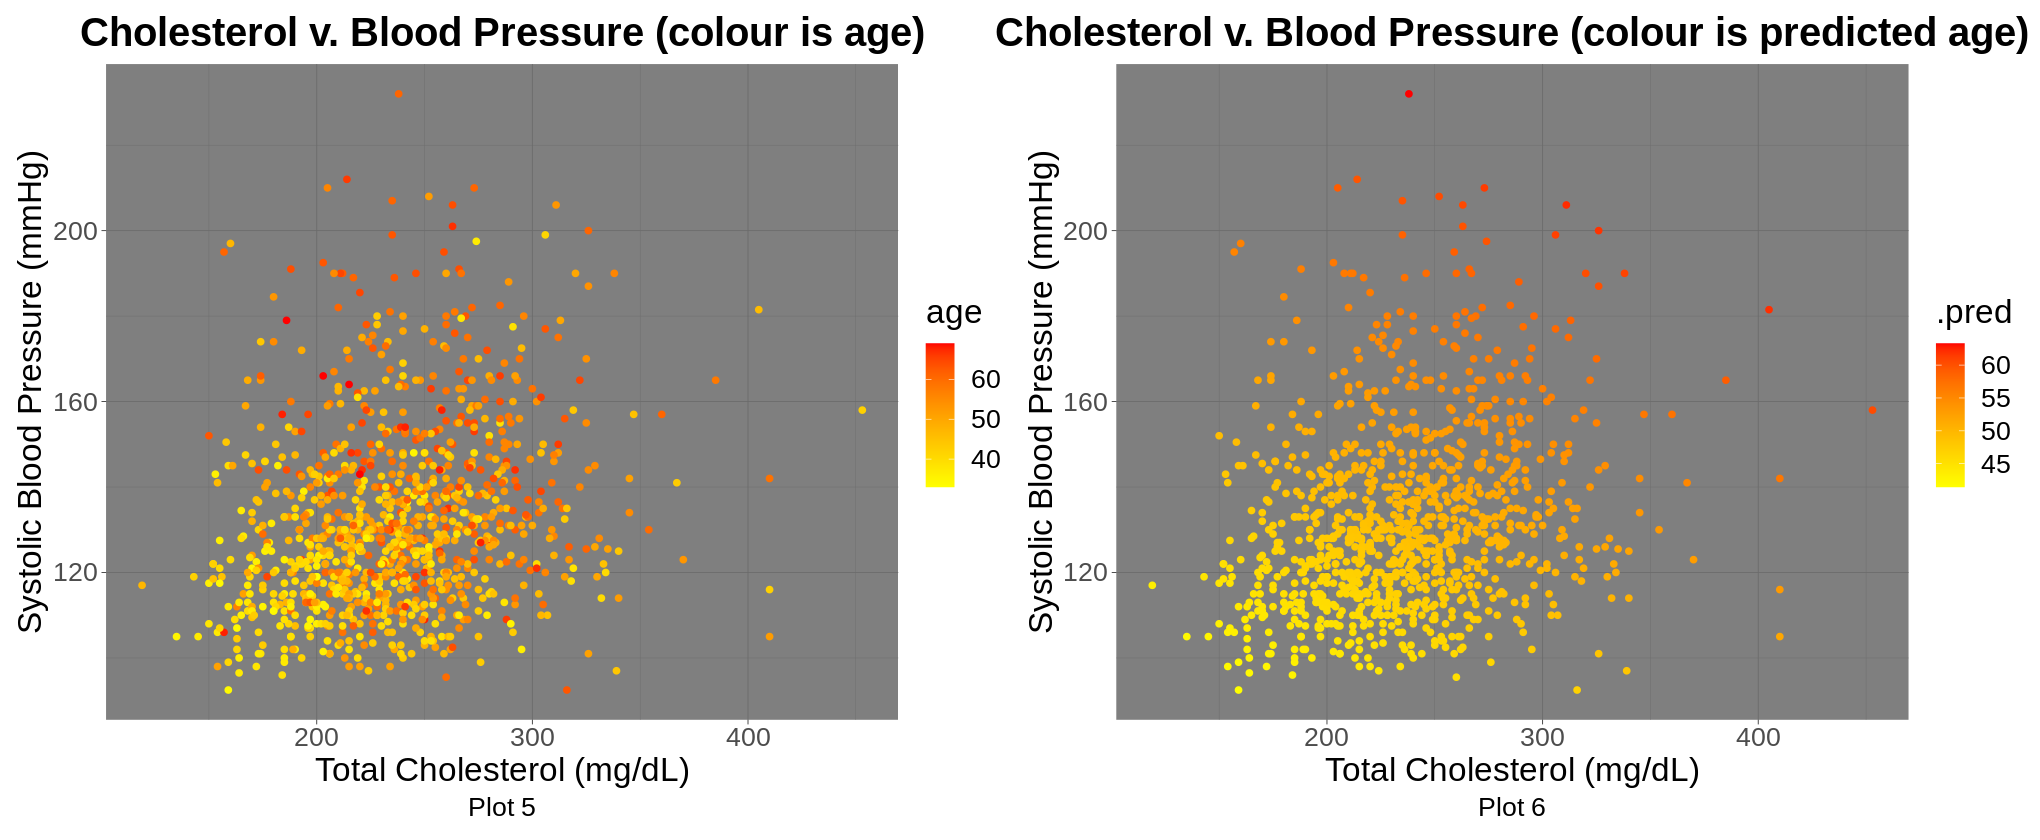

In [41]:
## Predict on testing data and plot 
set.seed(5) 

lm_preds <- predict(lm_fit, heart_disease_test) |>
      bind_cols(heart_disease_test)

options(repr.plot.width=17, repr.plot.height=7)

lm_plot1 <- lm_preds |>
  ggplot(aes(x = totChol, y = sysBP, color = age)) +
  geom_point() +
  labs(x = "Total Cholesterol (mg/dL)", 
       y = "Systolic Blood Pressure (mmHg)", 
       title = "Cholesterol v. Blood Pressure (colour is age)", 
       caption = "Plot 5") +
  theme_dark() +
 scale_color_gradient(low = "yellow", high = "red") + # Add color gradient
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

lm_plot2 <- lm_preds |>
  ggplot(aes(x = totChol, y = sysBP, color = .pred)) +
  geom_point() +
  labs(x = "Total Cholesterol (mg/dL)", 
       y = "Systolic Blood Pressure (mmHg)", 
       title = "Cholesterol v. Blood Pressure (colour is predicted age)", 
       caption = "Plot 6") +
  theme_dark() +
 scale_color_gradient(low = "yellow", high = "red") + # Add color gradient
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

lm_plot1 + lm_plot2 +
  plot_layout(ncol = 2)

## Discussion

As detailed in the Introductions section, we expected higher age to be associated with higher systolic blood pressure and total cholesterol. Although high blood pressure and cholesterol do not cause old age, we hypothesised that these variables would be correlated in this way. Although the results generally supported this hypothesis, the relationship was not as strong or consistent as we initially suspected.

Plot 2 shows that RMSE decreases exponentially and then reaches an asymptote for increasing k values. Plot 2 suggests that the underlying data structure requires a moderate number of neighbours to accurately predict, but beyond that point, increasing the number of neighbours does not significantly improve the model's predictive power. While the x-axis of Plot 2 is limited to 25, subsequent runs of the analysis with k values up to 500 showed the same asymptotic behaviour. 

The knn regression analysis showed that although higher age indeed tended to be associated with higher levels of the predictor variables, cholesterol and systolic blood pressure (as shown in Plot 1), the variability of the dataset impeded the ability of the knn regression model to create an accurate prediction model. Specifically, the range of the predicted class was limited to 49.53-49.55, indicating that the nearest neighbours were too variable to maintain the dataset’s true range in age. In other words, there was a lack of distinct clustering of the data points. However, Plot 1 clearly showed that people of old age are more associated with higher total cholesterol and systolic blood pressure, which supports our hypothesis. 

Retrospective reflection agrees with the unexpected relationship between the true and predicted ranges of age; people of all ages can and do experience high cholesterol and blood pressure. High cholesterol and blood pressure are influenced by a plethora of other factors outside of age including genetics and other external factors like diet, lifestyle, and environment, as explained in the introduction. This behaviour of the predicted variable being severely constrained in range is commonly associated with datasets exhibiting high levels of noise or variability and in datasets with nonlinear relationships between the predictor variables and the response variable. The scope of age in the data set was 32-70, a range of 38 years. Given that the RMPSE was 8.74, meaning that the predicted values were on average ~nine years from the true value, the knn model was not overly accurate. Nine is ~24% of 38, which is a relatively large deviation.

Using linear regression, we observed that the resultant model performed better on the testing data, indicated by the lower RMPSE value of 7.85. Plot 6 was similar in trend to Plot 4 (increasing age with increasing cholesterol and blood pressure), however, the range of the .pred class was much more reasonable (~40-65 as compared to the true range of ~35-70). This plot, in combination with the lower RMSPE, led us to conclude that linear regression was more suitable for our answering hypothesis using this particular dataset. The RMPSE informs that the predicted values were on average ~eight years from the true value, which is still not ideal given the range of age is only 38 years, but better than knn prediction given the range of age held true.

Overall, Plots 4 and 6 appear to show a simplified version of the actual relationship between age and the predictor variables with age increasing in tandem to cholesterol and blood pressure. Future studies might consider conducting the same analysis, but isolating the effect of age. For example, using data gathered from a controlled subset of the population with each observation being a healthy person with no outstanding health conditions, but variable in age. Such a dataset might better isolate the effects of age on cholesterol and blood pressure. This way, other factors such as obesity, stress, or other environmental factors would have less influence. 

This study raises questions about additional predictors of age that are not in the dataset and whether age is a suitable predictor of heart health. Are there additional important predictors of age that are not in the dataset? On the contrary, is age not well-predicted by heart health? Future studies might consider exploring these questions. The significance of such studies could be in informing patient treatment based on age. For example, if a given patient is admitted to the hospital, a healthcare provider can make a quick preliminary assessment based on age. If the patient is old, then they may be more susceptible to high cholesterol and/or blood pressure and it is thus important to consider testing for heart attack risk. The more information there is on the attributes of patients (i.e, age, gender, weight, etc.), as it relates to heart health, the more likely quick and effective treatment and/or testing can be provided catered to a person’s individual needs and predispositions. Another point is that older people can be made more aware of their risks and take preemptive measures to reduce the probability of heart disease, if these risks are known. 

## References

CDC. (2020). High Blood Pressure (Hypertension) Risk Factors. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/risk_factors.htm. Accessed Apr. 2023.  

CDC. (2019, February 6). Knowing Your Risk: High Cholesterol. Centers for Disease Control and Prevention. https://www.cdc.gov/cholesterol/risk_factors.htm. Accessed Apr. 2023.  

Heart Disease Dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset. Accessed Apr. 2023. 

Hopkins, J. (2023). Atherosclerosis. Www.hopkinsmedicine.org. https://www.hopkinsmedicine.org/health/conditions-and-diseases/atherosclerosis#:~:text=Atherosclerosis%20is%20thickening%20or%20hardening. Accessed Apr. 2023.  

Pinto E. (2007). Blood pressure and ageing. Postgraduate medical journal, 83(976), 109–114. https://doi.org/10.1136/pgmj.2006.048371. Accessed Apr. 2023. 

Shaper, A. G., Wannamethee, G., Macfarlane, P. W., & Walker, M. (1993). Heart rate, ischaemic heart disease, and sudden cardiac death in middle-aged British men. Heart, 70(1), 49–55. https://doi.org/10.1136/hrt.70.1.49. Accessed Apr. 2023.  

Tsao, Connie W., et al. (2022). Heart Disease and Stroke Statistics—2022 Update: A Report From the American Heart Association. Circulation, 145(8). https://doi.org/10.1161/cir.0000000000001052. Accessed Apr. 2023. 

U.S. National Library of Medicine. (2020, October 2). Cholesterol Levels: What You Need to Know. Medlineplus.gov; National Library of Medicine. https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html. Accessed Apr. 2023.   

Why Is Cholesterol Needed by the Body? (2022, March 24). Healthline. https://www.healthline.com/health/high-cholesterol/why-is-cholesterol-needed#what-to-do. Accessed Apr. 2023.  
